Import libraries

In [2]:
import os
import tensorflow as tf
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

Import the dataset

In [3]:
dataset = pd.read_csv('../GP/driver_imgs_list.csv')
dataset.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


Images overview

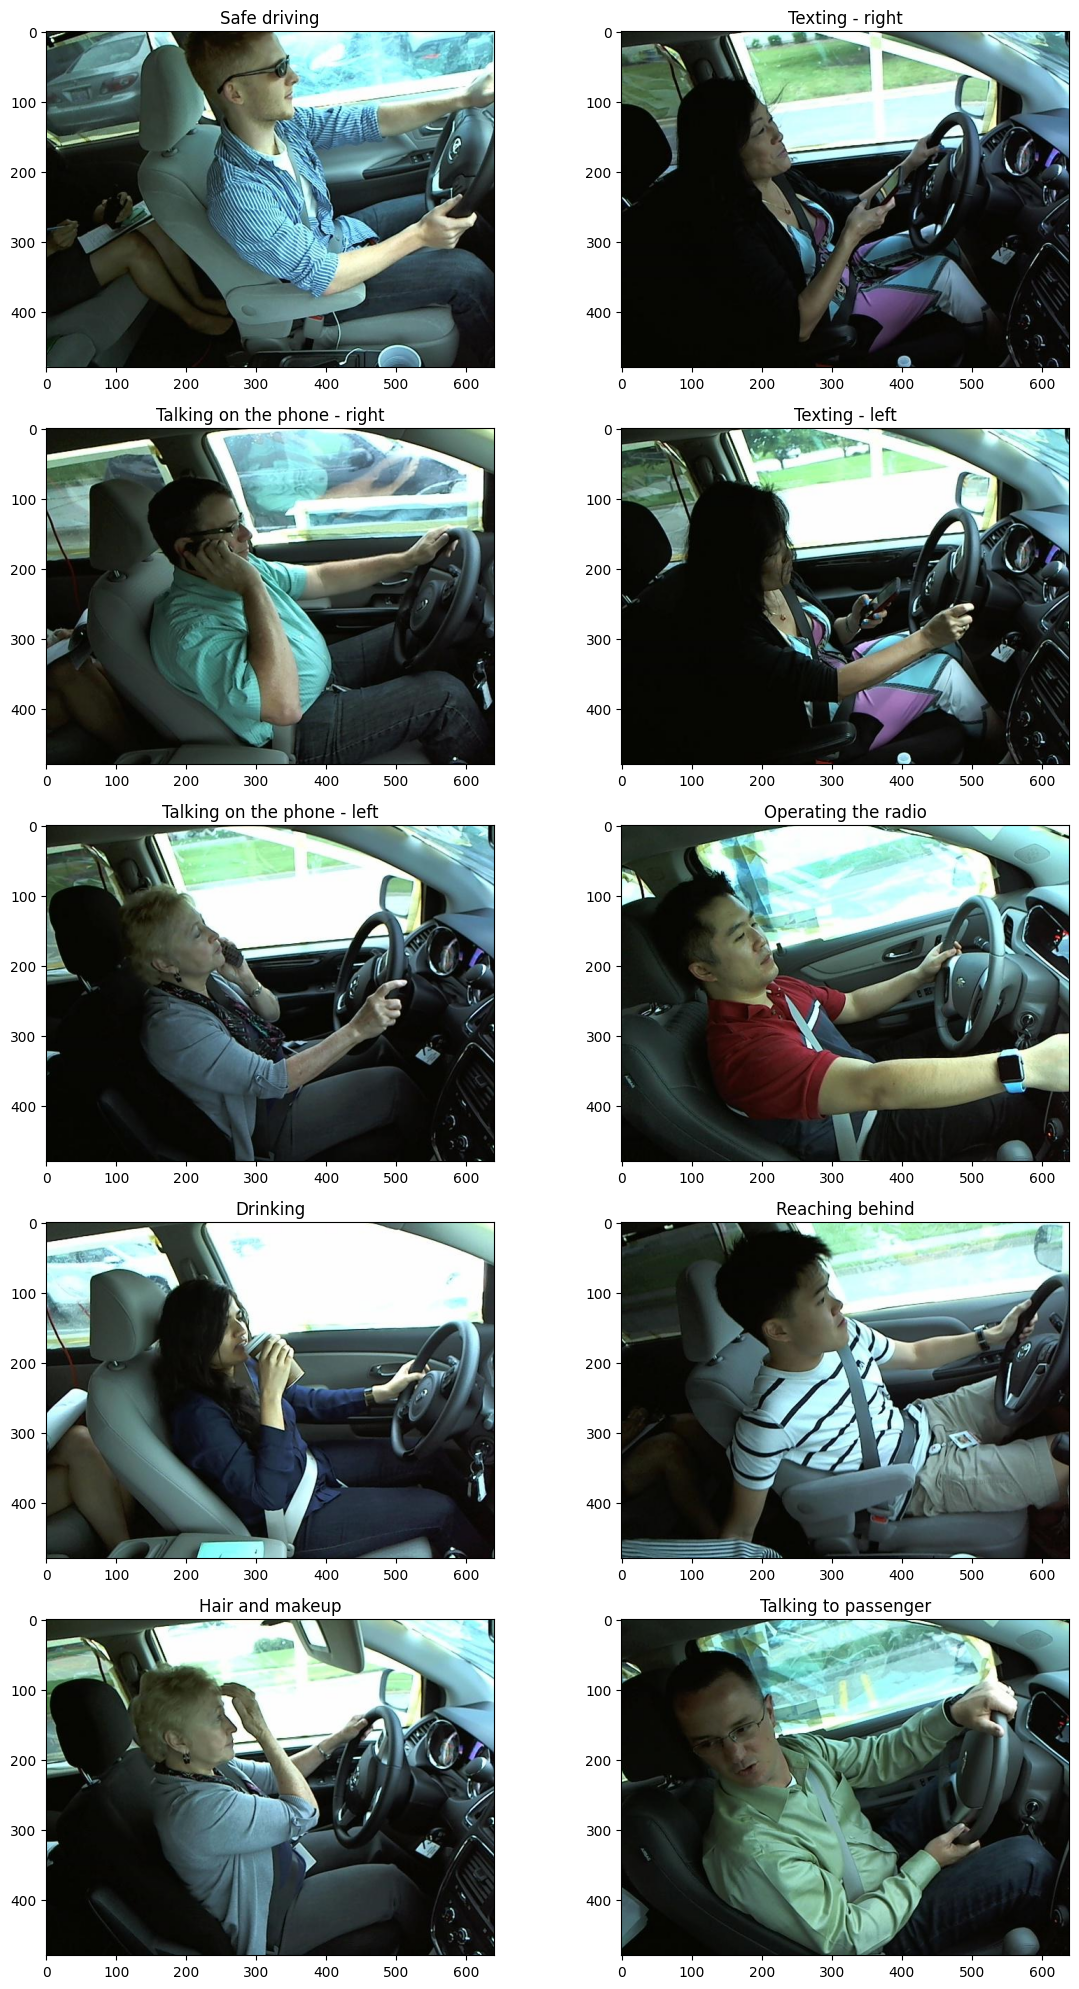

In [10]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

safe_activities = ['c0']
not_safe_activities = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

plt.figure(figsize=(12, 20))
image_count = 1
BASE_URL = '../GP/imgs/train/'

for directory in safe_activities:
    for i, file in enumerate(os.listdir(BASE_URL + directory)):
        if i == 1: 
            break
        else:
            fig = plt.subplot(5, 2, image_count)
            image_count += 1
            image = mpimg.imread(BASE_URL + directory + '/' + file)
            plt.imshow(image)
            plt.title(activity_map[directory])

for directory in not_safe_activities:
    for i, file in enumerate(os.listdir(BASE_URL + directory)):
        if i == 1:
            break
        else:
            fig = plt.subplot(5, 2, image_count)
            image_count += 1
            image = mpimg.imread(BASE_URL + directory + '/' + file)
            plt.imshow(image)
            plt.title(activity_map[directory])

plt.tight_layout()
plt.show()

Building the model

In [11]:
classifier = Sequential()
classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (240, 240, 3), data_format = 'channels_last'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 119, 119, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 32)      

Creating training data

In [13]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   validation_split = 0.2)

training_set = train_datagen.flow_from_directory('../GP/imgs/train/', 
                                                 target_size = (240, 240), 
                                                 batch_size = 32,
                                                 subset = 'training')

validation_set = train_datagen.flow_from_directory('../GP/imgs/train/', 
                                                   target_size = (240, 240), 
                                                   batch_size = 32,
                                                   subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


Train the model

In [14]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 17943/32,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = 4481/32)

Epoch 1/10


560/560 [==============================] - 1486s 3s/step - loss: 1.1963 - accuracy: 0.5846 - val_loss: 0.4913 - val_accuracy: 0.8436
Epoch 2/10
560/560 [==============================] - 1516s 3s/step - loss: 0.3174 - accuracy: 0.8998 - val_loss: 0.2395 - val_accuracy: 0.9232
Epoch 3/10
560/560 [==============================] - 1527s 3s/step - loss: 0.1902 - accuracy: 0.9421 - val_loss: 0.1571 - val_accuracy: 0.9514
Epoch 4/10
560/560 [==============================] - 1637s 3s/step - loss: 0.1422 - accuracy: 0.9559 - val_loss: 0.1410 - val_accuracy: 0.9576
Epoch 5/10
560/560 [==============================] - 1564s 3s/step - loss: 0.1100 - accuracy: 0.9662 - val_loss: 0.0965 - val_accuracy: 0.9721
Epoch 6/10
560/560 [==============================] - 1494s 3s/step - loss: 0.0981 - accuracy: 0.9705 - val_loss: 0.0862 - val_accuracy: 0.9757
Epoch 7/10
560/560 [==============================] - 1492s 3s/step - loss: 0.0804 - accuracy: 0.9750 - val_loss: 0.0944 - val_accurac

In [ ]:
classifier.save("model.h5")